# Data cleaning

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [2]:
df = pd.read_csv("../data/work.csv", parse_dates=["date"], index_col="date")
df

,state_id,store_id,dept_id,cat_id,item_id,wm_yr_wk,d,sales,sell_price,year,month,wday,weekday,event_name_1,event_type_1,event_name_2,event_type_2
date,,,,,,,,,,,,,,,,,
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_090,11249,d_704,0,1.25,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_120,11249,d_704,0,4.98,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_202,11249,d_704,20,4.28,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_252,11249,d_704,34,1.48,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_288,11249,d_704,0,NaN,2013,1,4,Tuesday,NewYear,National,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_329,11544,d_1767,5,2.98,2015,11,3,Monday,NaN,NaN,NaN,NaN
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_555,11544,d_1767,4,1.68,2015,11,3,Monday,NaN,NaN,NaN,NaN
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_586,11544,d_1767,9,1.68,2015,11,3,Monday,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21280 entries, 2013-01-01 to 2015-11-30
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_id      21280 non-null  object 
 1   store_id      21280 non-null  object 
 2   dept_id       21280 non-null  object 
 3   cat_id        21280 non-null  object 
 4   item_id       21280 non-null  object 
 5   wm_yr_wk      21280 non-null  int64  
 6   d             21280 non-null  object 
 7   sales         21280 non-null  int64  
 8   sell_price    21209 non-null  float64
 9   year          21280 non-null  int64  
 10  month         21280 non-null  int64  
 11  wday          21280 non-null  int64  
 12  weekday       21280 non-null  object 
 13  event_name_1  1700 non-null   object 
 14  event_type_1  1700 non-null   object 
 15  event_name_2  60 non-null     object 
 16  event_type_2  60 non-null     object 
dtypes: float64(1), int64(5), object(11)
memory usage: 2.

#### Conclusion:

- year, month and wday should be categorical data, not numerical

In [4]:
df = df.astype({"year":"O",
           "month":"O",
           "wday":"O"})
df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
sales             int64
sell_price      float64
year             object
month            object
wday             object
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

## Unique values

In [5]:
df.nunique().sort_values()

state_id           1
cat_id             1
dept_id            1
event_type_2       2
store_id           2
event_name_2       3
year               3
event_type_1       4
wday               7
weekday            7
item_id           10
month             12
sell_price        23
event_name_1      30
wm_yr_wk         153
sales            301
d               1064
dtype: int64

#### state_id, cat_id and dept_id only have one value. We can remove these features from the dataframe.

In [6]:
df.drop(columns=["state_id", "cat_id", "dept_id"], inplace=True)

## Duplicate values

In [7]:
df.duplicated().sum()

0

## Separate categorical from numerical data

In [8]:
cat = df.select_dtypes(exclude = 'number').copy()
cat

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1,event_name_2,event_type_2
date,,,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA_3,FOODS_3_252,d_704,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA_3,FOODS_3_288,d_704,2013,1,4,Tuesday,NewYear,National,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,CA_4,FOODS_3_329,d_1767,2015,11,3,Monday,NaN,NaN,NaN,NaN
2015-11-30,CA_4,FOODS_3_555,d_1767,2015,11,3,Monday,NaN,NaN,NaN,NaN
2015-11-30,CA_4,FOODS_3_586,d_1767,2015,11,3,Monday,NaN,NaN,NaN,NaN


In [9]:
num = df.select_dtypes(include='number').copy()
num

,wm_yr_wk,sales,sell_price
date,,,
2013-01-01,11249,0,1.25
2013-01-01,11249,0,4.98
2013-01-01,11249,20,4.28
2013-01-01,11249,34,1.48
2013-01-01,11249,0,NaN
...,...,...,...
2015-11-30,11544,5,2.98
2015-11-30,11544,4,1.68
2015-11-30,11544,9,1.68


## Categorical data

### Nulls

In [10]:
cat.isna().sum().sort_values(ascending=False)

event_name_2    21220
event_type_2    21220
event_name_1    19580
event_type_1    19580
store_id            0
item_id             0
d                   0
year                0
month               0
wday                0
weekday             0
dtype: int64

#### There's something going on with event_name and event_type.

In [11]:
cat["event_name_1"].value_counts(dropna=False)

NaN                    19580
NewYear                   60
Mother's day              60
Thanksgiving              60
VeteransDay               60
Halloween                 60
EidAlAdha                 60
ColumbusDay               60
LaborDay                  60
Eid al-Fitr               60
Ramadan starts            60
IndependenceDay           60
NBAFinalsEnd              60
NBAFinalsStart            60
MemorialDay               60
Pesach End                60
Easter                    60
StPatricksDay             60
Purim End                 60
LentWeek2                 60
PresidentsDay             60
ValentinesDay             60
LentStart                 60
SuperBowl                 60
MartinLutherKingDay       60
OrthodoxChristmas         60
OrthodoxEaster            40
Father's day              40
Chanukah End              40
Christmas                 40
Cinco De Mayo             40
Name: event_name_1, dtype: int64

In [12]:
cat["event_name_2"].value_counts(dropna=False)

NaN               21220
Cinco De Mayo        20
OrthodoxEaster       20
Father's day         20
Name: event_name_2, dtype: int64

In [13]:
cat.event_type_1.value_counts(dropna=False)

NaN          19580
National       580
Religious      560
Cultural       380
Sporting       180
Name: event_type_1, dtype: int64

In [14]:
cat.event_type_2.value_counts(dropna=False)

NaN          21220
Cultural        40
Religious       20
Name: event_type_2, dtype: int64

In [15]:
pd.crosstab(index=cat['event_name_1'], columns=cat['event_name_2'])

event_name_2,Cinco De Mayo,Father's day,OrthodoxEaster
event_name_1,,,
Easter,0,0,20
NBAFinalsEnd,0,20,0
OrthodoxEaster,20,0,0


#### Conclusion:

- event_name_2 includes events from event_name_1
- it can be seen from the crosstab that they're not corresponded on each dataset
- we don't know why it happens so we're gonna get rid of event_name_2 and event_type_2
- the null values from event_name_1 and event_type_1 are days without event, so we're going to fill them with "no_event"

In [16]:
cat.drop(columns=["event_name_2","event_type_2"], inplace=True)

In [17]:
cat[["event_name_1","event_type_1"]] = cat[["event_name_1","event_type_1"]].fillna("no_event")

#### Check the nulls are fixed

In [18]:
cat.isna().sum()

store_id        0
item_id         0
d               0
year            0
month           0
wday            0
weekday         0
event_name_1    0
event_type_1    0
dtype: int64

## Outliers

#### Low frequency values

In [19]:
for i in cat:
    print(i + "\n")
    print(cat[i].value_counts(dropna = False))
    print("\n")

store_id

CA_3    10640
CA_4    10640
Name: store_id, dtype: int64


item_id

FOODS_3_090    2128
FOODS_3_120    2128
FOODS_3_202    2128
FOODS_3_252    2128
FOODS_3_288    2128
FOODS_3_329    2128
FOODS_3_555    2128
FOODS_3_586    2128
FOODS_3_587    2128
FOODS_3_714    2128
Name: item_id, dtype: int64


d

d_704     20
d_1418    20
d_1404    20
d_1405    20
d_1406    20
          ..
d_1064    20
d_1065    20
d_1066    20
d_1067    20
d_1767    20
Name: d, Length: 1064, dtype: int64


year

2013    7300
2014    7300
2015    6680
Name: year, dtype: int64


month

1     1860
3     1860
5     1860
7     1860
8     1860
10    1860
4     1800
6     1800
9     1800
11    1800
2     1680
12    1240
Name: month, dtype: int64


wday

4    3040
5    3040
6    3040
7    3040
1    3040
2    3040
3    3040
Name: wday, dtype: int64


weekday

Tuesday      3040
Wednesday    3040
Thursday     3040
Friday       3040
Saturday     3040
Sunday       3040
Monday       3040
Name: weekday, dtype: int64


e

#### Conclusion:

- There are no rare categories. We can see how there's less data for 2015 but that's just the validation dataset we removed from the previous Notebook.

## Numerical data

### Basic statistics

In [20]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sales,21280.0,28.874577,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21209.0,2.397254,1.237024,1.0,1.5,1.58,2.98,4.98


### Nulls

In [21]:
num.isna().sum()

wm_yr_wk       0
sales          0
sell_price    71
dtype: int64

#### sell_price is a relevant variable. Let's see if we can find why there are nulls in that variable.

In [22]:
# Let's group by product
df.groupby(["item_id"]).apply(lambda x: x["sell_price"].isna().sum())

item_id
FOODS_3_090     0
FOODS_3_120     0
FOODS_3_202     0
FOODS_3_252     0
FOODS_3_288    71
FOODS_3_329     0
FOODS_3_555     0
FOODS_3_586     0
FOODS_3_587     0
FOODS_3_714     0
dtype: int64

In [23]:
# Let's group by sales
df.groupby(["sales"]).apply(lambda x: x["sell_price"].isna().sum())

sales
0      71
1       0
2       0
3       0
4       0
       ..
554     0
613     0
620     0
709     0
763     0
Length: 301, dtype: int64

#### Conclusion:

- Basically the null values are from a product with zero sells.
- We know that such product always has a price (maybe not constant)
- Let's fix this by filling those NaN values with the mode of it's price, and we're gonna do it for every product even if there are no nulls for now (there might be nulls in a future dataset)

In [24]:
# Add item_id to the num dataset
num = pd.concat([num, cat["item_id"]], axis=1)
num

,wm_yr_wk,sales,sell_price,item_id
date,,,,
2013-01-01,11249,0,1.25,FOODS_3_090
2013-01-01,11249,0,4.98,FOODS_3_120
2013-01-01,11249,20,4.28,FOODS_3_202
2013-01-01,11249,34,1.48,FOODS_3_252
2013-01-01,11249,0,NaN,FOODS_3_288
...,...,...,...,...
2015-11-30,11544,5,2.98,FOODS_3_329
2015-11-30,11544,4,1.68,FOODS_3_555
2015-11-30,11544,9,1.68,FOODS_3_586


In [25]:
def fill_mode(records):
    '''''
    Function that fills the null values of
    the records with values with the mode of that same product.
    Returns the same records but with no nulls.
    '''''
    mode = records["sell_price"].mode()[0]
    records.loc[records["sell_price"].isna(), "sell_price"] = mode
    return records

In [26]:
num = num.groupby(["item_id"]).apply(fill_mode)
num

,wm_yr_wk,sales,sell_price,item_id
date,,,,
2013-01-01,11249,0,1.25,FOODS_3_090
2013-01-01,11249,33,1.25,FOODS_3_090
2013-01-01,11249,0,4.98,FOODS_3_120
2013-01-01,11249,0,4.98,FOODS_3_120
2013-01-01,11249,20,4.28,FOODS_3_202
...,...,...,...,...
2015-11-30,11544,9,1.68,FOODS_3_586
2015-11-30,11544,26,2.48,FOODS_3_587
2015-11-30,11544,13,2.48,FOODS_3_587


In [27]:
num.isna().sum()

wm_yr_wk      0
sales         0
sell_price    0
item_id       0
dtype: int64

#### There are no nulls now. But the order of the dataset changed. We need to reset it and get rid of the item_id feature.

In [28]:
num = num.reset_index().set_index("date")
num

,wm_yr_wk,sales,sell_price,item_id
date,,,,
2013-01-01,11249,0,1.25,FOODS_3_090
2013-01-01,11249,33,1.25,FOODS_3_090
2013-01-01,11249,0,4.98,FOODS_3_120
2013-01-01,11249,0,4.98,FOODS_3_120
2013-01-01,11249,20,4.28,FOODS_3_202
...,...,...,...,...
2015-11-30,11544,9,1.68,FOODS_3_586
2015-11-30,11544,26,2.48,FOODS_3_587
2015-11-30,11544,13,2.48,FOODS_3_587


In [29]:
num.groupby(["item_id"])["sell_price"].value_counts()

item_id      sell_price
FOODS_3_090  1.48           658
             1.38           546
             1.44           504
             1.00           280
             1.50            90
             1.25            50
FOODS_3_120  4.98          2128
FOODS_3_202  4.58           727
             4.38           525
             4.28           386
             3.98           350
             3.00           105
             3.33            21
             3.25             7
             4.48             7
FOODS_3_252  1.58          1182
             1.48           946
FOODS_3_288  1.50          2100
             1.25            21
             1.18             7
FOODS_3_329  2.98          2079
             2.74            42
             1.98             7
FOODS_3_555  1.58          1149
             1.68           979
FOODS_3_586  1.58          1149
             1.68           979
FOODS_3_587  2.48          1644
             2.68           421
             1.98            63
FOODS_3_714  1.5

In [30]:
num.drop(columns="item_id", inplace=True)

In [31]:
num

,wm_yr_wk,sales,sell_price
date,,,
2013-01-01,11249,0,1.25
2013-01-01,11249,33,1.25
2013-01-01,11249,0,4.98
2013-01-01,11249,0,4.98
2013-01-01,11249,20,4.28
...,...,...,...
2015-11-30,11544,9,1.68
2015-11-30,11544,26,2.48
2015-11-30,11544,13,2.48


In [32]:
# We need to sort the values in the same way for cat dataframe
cat.groupby("item_id")[cat.columns].apply(lambda x: x).reset_index().set_index("date")

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1
date,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_4,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_4,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National
...,...,...,...,...,...,...,...,...,...
2015-11-30,CA_4,FOODS_3_586,d_1767,2015,11,3,Monday,no_event,no_event
2015-11-30,CA_3,FOODS_3_587,d_1767,2015,11,3,Monday,no_event,no_event
2015-11-30,CA_4,FOODS_3_587,d_1767,2015,11,3,Monday,no_event,no_event


## Outliers

#### In order to detect outliers in the numerical variables, all the data points away from the mean 4 standard deviations are going to be considered outliers.

In [33]:
num_std_dev = 4

In [34]:
def outliers_std_dev(variable, num_std_dev = 4):
    '''''
    Function that computes the mean of a variable and 
    returns the index of that variable that are 4 standard deviations away
    from the mean.
    '''''
    #remove nulls
    variable = variable.dropna()
    #compute upper and lower bounds
    mean = np.mean(variable)
    sd = np.std(variable)
    threshold = sd * num_std_dev
    lower_bound = mean - threshold
    upper_bound = mean + threshold
    #compute the index values above and below the upper and lower bounds
    index = [index for index,value in variable.items() if value < lower_bound or value > upper_bound]
    return(index)

In [35]:
def outlier_counts(df,variable, num_desv_tip = 4):
    '''''
    Function that computes the outlier index from outliers_std_dev() given a 
    dataframe and a variable, and returns the number of times each outlier
    takes place on the given variable.
    '''''
    outlier_index = outliers_std_dev(df[variable], num_desv_tip)
    return(df.loc[outlier_index, variable].value_counts())

In [36]:
outlier_variables = ['sales','sell_price']

In [37]:
for variable in outlier_variables:
    print('\n' + variable + ':\n')
    print(outlier_counts(num,variable, num_std_dev))


sales:

0      518
1      103
5      100
10      95
7       92
      ... 
340      1
239      1
250      1
469      1
323      1
Name: sales, Length: 247, dtype: int64

sell_price:

Series([], Name: sell_price, dtype: int64)


#### From that we see that low values of sales (close to 0) are the most frequent ones. This might be the typical case of a retailer (not having many sales on a daily basis but just few).

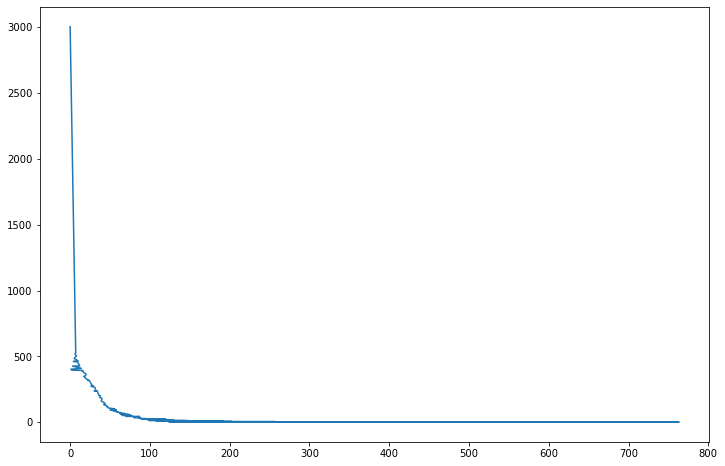

In [38]:
num["sales"].value_counts().plot(figsize=(12,8));

#### Further analysis to be done during the Exploratory Data Analysis (EDA) section.

## Save dataset after cleaning

#### Data are going to be saved in a pickle format after this cleaning process.

In [39]:
df.to_pickle("../data/work_quality.pickle")
cat.to_pickle("../data/cat_quality.pickle")
num.to_pickle("../data/num_quality.pickle")